# KNN 펭귄 데이터

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [41]:
penguins = pd.read_csv("https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv")
penguins.shape

(344, 7)

In [42]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [43]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [44]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [45]:
penguins[penguins['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [46]:
df = penguins.drop([3,339], axis=0)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [47]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [48]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [49]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [50]:
df['species'] = df['species'].map({'Adelie':0, 
                                     'Chinstrap':1, 
                                     'Gentoo':2})
df['island'] = df['island'].map({'Biscoe':0, 
                                   'Dream':1, 
                                   'Torgersen':2})
df['sex'] = df['sex'].map({'FEMALE':0, 
                             'MALE':1})
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1.0
1,0,2,39.5,17.4,186.0,3800.0,0.0
2,0,2,40.3,18.0,195.0,3250.0,0.0
4,0,2,36.7,19.3,193.0,3450.0,0.0
5,0,2,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0.0
340,2,0,46.8,14.3,215.0,4850.0,0.0
341,2,0,50.4,15.7,222.0,5750.0,1.0
342,2,0,45.2,14.8,212.0,5200.0,0.0


### 결측치 성별을 male(일정부분 더 많음)으로 진행할 경우 

In [51]:
## 결측치 성별을 male로 진행할 경우 
df2 = df.copy()
df2['sex'] = df2['sex'].fillna('1')

In [52]:
## 결측치 성별을 female로 진행할 경우
df3 = df.copy()
df3['sex'] = df3['sex'].fillna('0')

In [54]:
df2.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 데이터 분할

In [60]:
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((273, 6), (69, 6), (273,), (69,))

In [106]:
y_train.value_counts()

0    115
2    102
1     56
Name: species, dtype: int64

## 정규화

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
y_train_s = y_train.values
X_test_s = scaler.transform(X_train)
y_test_s = y_test.values

In [108]:
from sklearn.neighbors import KNeighborsClassifier

score = []

for i in range(3,30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_s, y_train_s)
    s = clf.score(X_train_s, y_train_s)
    score.append(s)

C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

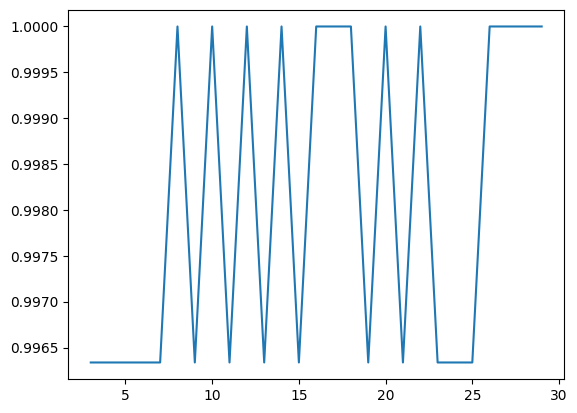

In [109]:
plt.plot(np.arange(3,30),score)
plt.show()

In [110]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

s = clf.score(X_train, y_train)
print('accuracy: ', s)

accuracy:  0.8278388278388278


C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [111]:
# 예측
y_pred = clf.predict(X_test)

C:\Users\006\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [112]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[33,  0,  3],
       [ 7,  3,  2],
       [ 2,  0, 19]], dtype=int64)

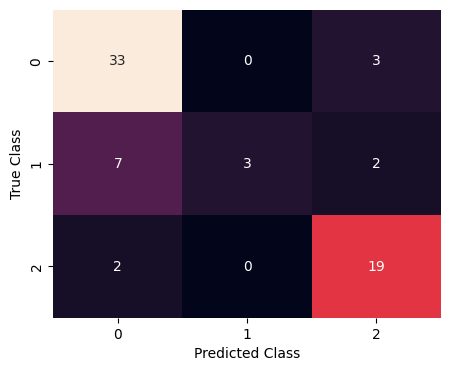

In [113]:
plt.figure(figsize=(5,4))
sns.heatmap(cfm, annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [114]:
## 평가지표 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):

    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)
    # 기본이 이진분류이므로 설정을 바꿔주어야 함
    rec = recall_score(y_true, y_pred, average=average)

    print("accuracy:", acc)
    print("precision:", pre)
    print("recall:", rec)

In [115]:
print_score(y_test, y_pred, average='macro')

accuracy: 0.7971014492753623
precision: 0.8591269841269841
recall: 0.6904761904761904
